In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
%matplotlib inline
import random
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

In [2]:
df=pd.read_csv('/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv')
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [3]:
df.shape

(2263, 19)

In [4]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('\n','_') 
df.rename(columns = {'over total electors _in constituency':'total_voters',
                    'over total votes polled _in constituency':'votes_polled',
                    'total electors':'total_electors'},inplace=True)

In [5]:
print('Major parties that contested elections in 2019 General Elections =',df['party'].nunique())

Major parties that contested elections in 2019 General Elections = 133


In [6]:
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
df['assets'] = df['assets'].apply((value_cleaner))
df['liabilities'] = df['liabilities'].apply((value_cleaner))
df.head()

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690


In [7]:
df['education']=df['education'].str.replace('\n','')
df['party']=df['party'].str.replace('TRS','BRS')

In [8]:
df1=df[df['party']!='NOTA']
df1.isnull().sum()

state             0
constituency      0
name              0
winner            0
party             0
symbol            0
gender            0
criminal_cases    0
age               0
category          0
education         0
assets            0
liabilities       0
general_votes     0
postal_votes      0
total_votes       0
total_voters      0
votes_polled      0
total_electors    0
dtype: int64

### There are no missing values

In [9]:
df.dtypes

state              object
constituency       object
name               object
winner              int64
party              object
symbol             object
gender             object
criminal_cases     object
age               float64
category           object
education          object
assets             object
liabilities        object
general_votes       int64
postal_votes        int64
total_votes         int64
total_voters      float64
votes_polled      float64
total_electors      int64
dtype: object

In [10]:
df=df.fillna(0)
df['criminal_cases']=df['criminal_cases'].replace({'Not Available':0})
df['criminal_cases'] = pd.to_numeric(df['criminal_cases'],errors='coerce').astype(np.int64)
df['age']=df['age'].apply(lambda x:round(x))

def numer(i):
    df[i]=pd.to_numeric(df[i])

numer('assets')
numer('liabilities')
numer('age')


<AxesSubplot:>

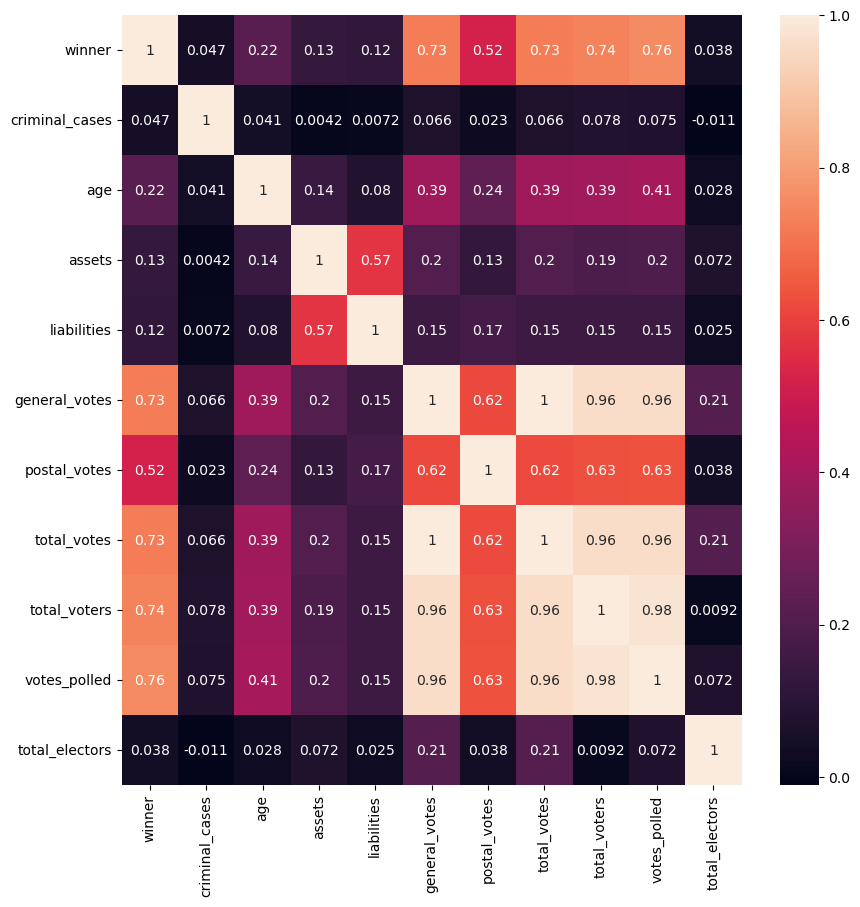

In [11]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## DISTRIBUTION OF CONSTITUENCIES OVER ALL THE STATES

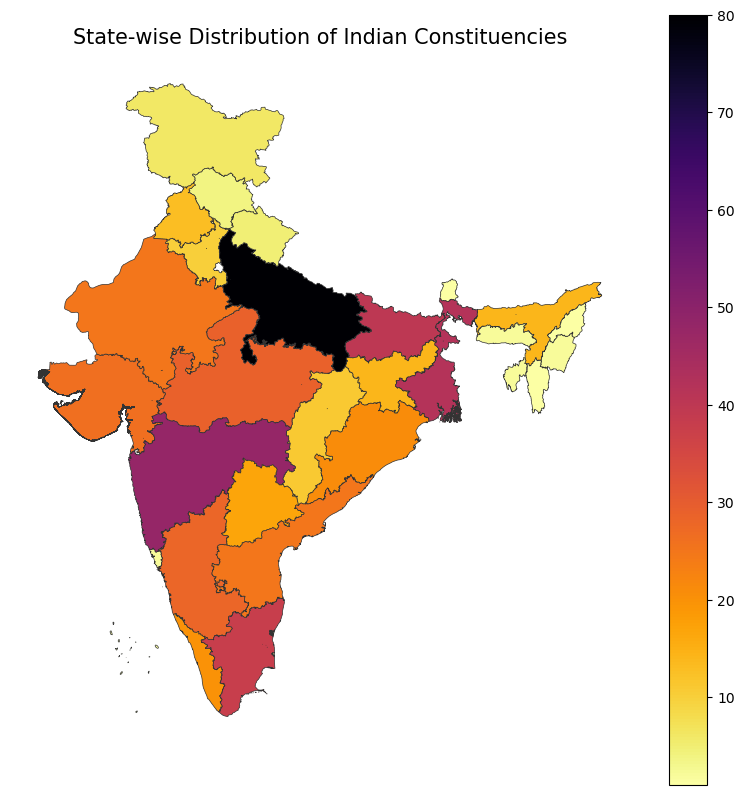

In [12]:
st=df.groupby('state').apply(lambda x:x['constituency']
                             .nunique()).reset_index(name='constituency')
shp_gdf = gpd.read_file('/kaggle/input/india-states/Igismap/Indian_States.shp')
merged=shp_gdf.set_index('st_nm').join(st.set_index('state'))
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Distribution of Indian Constituencies',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='constituency', cmap='inferno_r',
                  linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

st.sort_values(by='constituency',ascending=False,inplace=True)
fig2 = px.bar(st, x='state', y='constituency',
                     color='constituency',
             labels={'pop':'Constituencies of India'})
fig2.update_layout(title_text='Statewise distribution of the Constituencies all over India',
                   template='plotly_dark')
fig2.show()

#### U.P has the most parliament seats of 80.
#### The seats are divided based on the population of the state. The division of seats is followed based on 1971 population data.

In [13]:
df.head(10)

,state,constituency,name,winner,party,symbol,gender,criminal_cases,age,category,education,assets,liabilities,general_votes,postal_votes,total_votes,total_voters,votes_polled,total_electors
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,BRS,Car,MALE,0,54,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,0,0,0,0,0,0,0,0,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47,SC,Post Graduate,133784385,22251891,434199,1130,435329,22.466390,37.999125,1937690
6,Uttar Pradesh,AGRA,Preeta Harit,0,INC,Hand,FEMALE,0,54,SC,Post Graduate,55075753,0,44877,272,45149,2.330042,3.940979,1937690
7,Maharashtra,AHMADNAGAR,Dr. SUJAY RADHAKRISHNA VIKHEPATIL,1,BJP,Lotus,MALE,0,37,GENERAL,Doctorate,168664576,2623964,696961,7699,704660,37.856533,58.425159,1861396
8,Maharashtra,AHMADNAGAR,SANGRAM ARUNKAKA JAGTAP,0,NCP,Clock,MALE,1,34,GENERAL,Graduate,94488381,32549132,419364,3822,423186,22.734872,35.087431,1861396
9,Maharashtra,AHMADNAGAR,SUDHAKAR LAXMAN AVHAD,0,VBA,Cup & Saucer,MALE,0,62,GENERAL,Graduate,13949000,1400000,31644,163,31807,1.708771,2.637200,1861396


### Creating Sunburst image of all states and constituencies

In [14]:
st_val=df[['state','constituency','total_electors']]
fig=px.sunburst(st_val,path=['state','constituency']
                ,values='total_electors',
               color='total_electors',
               color_continuous_scale='viridis_r')
fig.update_layout(title_text='Sunburst Image of States and Constituencies',
                  template='plotly_dark')
fig.show()